#                                                        Data Science applied to maintenance planning optimization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
prev='C:\\Users\\PICHAU\\Downloads\\air_system_previous_years.csv'

In [5]:
previous = pd.read_csv(prev, na_values='na')

## Initial Data Exploration:

In [7]:
print(previous.head(10))

  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
5   neg   38312     NaN  2.130706e+09   218.0     0.0     0.0     0.0     0.0   
6   neg      14     0.0  6.000000e+00     NaN     0.0     0.0     0.0     0.0   
7   neg  102960     NaN  2.130706e+09   116.0     0.0     0.0     0.0     0.0   
8   neg   78696     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
9   pos  153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003     ee_004     ee_005     ee_006  \
0     0.0  ...  1240520.0  493384.0 

In [8]:
print(previous.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB
None


In [9]:
print(previous.describe())

             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.

In [10]:
missing_values = previous.isna().sum()
print(missing_values[missing_values > 0])

ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 169, dtype: int64


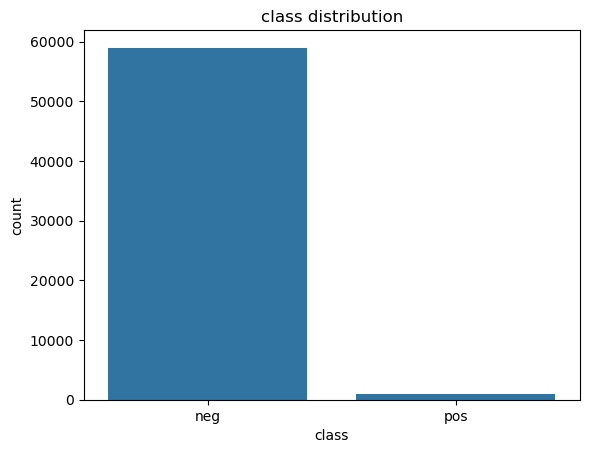

ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 169, dtype: int64


In [11]:
sns.countplot(x='class', data=previous)
plt.title('class distribution')
plt.show()

missing_values = previous.isna().sum()
print(missing_values[missing_values > 0])

In [12]:
numerical_cols = previous.select_dtypes(include=['number']).columns
previous[numerical_cols] = previous[numerical_cols].fillna(previous[numerical_cols].mean())


In [13]:
missing_values = previous.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [14]:
print(previous.head(10))

  class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   
5   neg   38312  0.713189  2.130706e+09     218.000000     0.0     0.0   
6   neg      14  0.000000  6.000000e+00  190620.639314     0.0     0.0   
7   neg  102960  0.713189  2.130706e+09     116.000000     0.0     0.0   
8   neg   78696  0.713189  0.000000e+00  190620.639314     0.0     0.0   
9   pos  153204  0.000000  1.820000e+02  190620.639314     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1     0.0     0.0     0.0  ... 

### F TESTE of ANOVA

#### Selection of Characteristics

In [17]:
X = previous.drop('class', axis=1)
y = previous['class'].apply(lambda x: 1 if x == 'pos' else 0)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Best features:", selected_features)

Best features: Index(['aa_000', 'ah_000', 'aq_000', 'bb_000', 'bj_000', 'bt_000', 'bu_000',
       'bv_000', 'ci_000', 'cq_000'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [89] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<span style="color: red;">Warning: The characteristic at index 89 is constant.</span>

In [19]:
# Identify constant characteristics
constant = previous.columns[previous.nunique() == 1]
print("constant characteristics:", constant)

constant characteristics: Index(['cd_000'], dtype='object')


In [20]:
# Remove constant characteristics
previous_without_constants = previous.drop(columns=constant)

In [21]:
print(previous_without_constants.head(10))

  class  aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg   76698  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg   33058  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg   41040  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg      12  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg   60874  0.713189  1.368000e+03     458.000000     0.0     0.0   
5   neg   38312  0.713189  2.130706e+09     218.000000     0.0     0.0   
6   neg      14  0.000000  6.000000e+00  190620.639314     0.0     0.0   
7   neg  102960  0.713189  2.130706e+09     116.000000     0.0     0.0   
8   neg   78696  0.713189  0.000000e+00  190620.639314     0.0     0.0   
9   pos  153204  0.000000  1.820000e+02  190620.639314     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1     0.0     0.0     0.0  ... 

In [22]:
X = previous_without_constants.drop('class', axis=1)
y = previous_without_constants['class'].apply(lambda x: 1 if x == 'pos' else 0)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Best features:", selected_features)

Best features: Index(['aa_000', 'ah_000', 'aq_000', 'bb_000', 'bj_000', 'bt_000', 'bu_000',
       'bv_000', 'ci_000', 'cq_000'],
      dtype='object')


------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
# Preparing the data
X = previous_without_constants.drop(columns=['class'])  # Remover a coluna 'class' de X
y = previous_without_constants['class'].apply(lambda x: 1 if x == 'pos' else 0)  # Variável target

In [25]:
# Division of data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Creating and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Evaluation of the Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11800
           1       0.90      0.72      0.80       200

    accuracy                           0.99     12000
   macro avg       0.95      0.86      0.90     12000
weighted avg       0.99      0.99      0.99     12000



## Class Balancing and Training:

                              SMOTE (Synthetic Minority Over-sampling Technique)

In [30]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [31]:
# Division of actual data in training and testing
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

-------------------------------------------------------------------------------------------------------------------------------------

                    SMOTEENN = SMOTE(Synthetic Minority Over-sampling Technique) + ENN (Edited Nearest Neighbors)

In [34]:
from imblearn.combine import SMOTEENN
# Application of SMOTEENN to data resulting from SMOTE
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_smote, y_train_smote)

-------------------------------------------------------------------------------------------------------------------------------------

In [35]:
# Data scaling
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [36]:
#  Reduction of dimensionality with PCA
pca = PCA(n_components=10)
X_resampled = pca.fit_transform(X_resampled)
X_test = pca.transform(X_test)

-------------------------------------------------------------------------------------------------------------------------------------

In [37]:
# Model training with the re-shown data
model_resampled = RandomForestClassifier(random_state=42)
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

## Evaluation of the Model:

In [39]:
y_pred_resampled = model_resampled.predict(X_test)
print("Classification Report after applying SMOTE and SMOTEENN:")
print(classification_report(y_test, y_pred_resampled))

Classification Report after applying SMOTE and SMOTEENN:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11800
           1       0.33      0.94      0.49       200

    accuracy                           0.97     12000
   macro avg       0.66      0.96      0.73     12000
weighted avg       0.99      0.97      0.97     12000



---------------------------------------------------------------------------------------------------------------------------

# Apply the trained model in the present data and evaluate its performance.

## Prepare data for forecast: 

In [43]:
pres = 'C:\\Users\\PICHAU\\Downloads\\air_system_present_year.csv'

In [44]:
present = pd.read_csv(pres, na_values='na')

## Initial Data Exploration:

In [46]:
print(present.head(10))

  class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0     0.0   
5   neg     174     NaN  2.600000e+01    24.0     0.0     0.0     NaN     NaN   
6   neg   40202     NaN  6.400000e+02   606.0     0.0     0.0     0.0     0.0   
7   neg  120278     NaN  2.130706e+09   256.0     0.0     0.0     0.0     0.0   
8   neg   14592     0.0  2.130706e+09   162.0     0.0     0.0     0.0     0.0   
9   neg   28338     NaN  2.130706e+09   238.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...     1098.0   

In [47]:
print(present.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB
None


In [48]:
# Descrever estatísticas descritivas dos dados
print(present.describe())

             aa_000       ab_000        ac_000        ad_000        ae_000  \
count  1.600000e+04  3637.000000  1.507400e+04  12019.000000  15310.000000   
mean   6.799698e+04     0.772065  3.580393e+08    439.498794      6.428347   
std    5.035350e+05     2.589224  7.966968e+08   1551.328109    118.186469   
min    0.000000e+00     0.000000  0.000000e+00      0.000000      0.000000   
25%    9.280000e+02     0.000000  1.600000e+01     26.000000      0.000000   
50%    3.098200e+04     0.000000  1.590000e+02    130.000000      0.000000   
75%    4.947900e+04     0.000000  1.003500e+03    430.000000      0.000000   
max    4.294967e+07    58.000000  2.130707e+09  87038.000000  11044.000000   

             af_000         ag_000        ag_001        ag_002        ag_003  \
count  15310.000000   15811.000000  1.581100e+04  1.581100e+04  1.581100e+04   
mean      10.195950     120.858516  2.064204e+03  1.379236e+04  1.126276e+05   
std      167.260463    6454.660300  8.925778e+04  2.35840

In [49]:
# Check missing values
missing_values = present.isna().sum()
print(missing_values[missing_values > 0])

ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 169, dtype: int64


## Exploratory Analysis and Data Preparation:

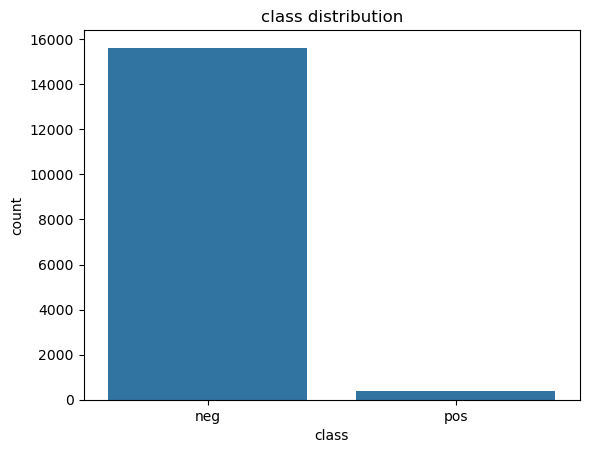

ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 169, dtype: int64


In [51]:
sns.countplot(x='class', data=present)
plt.title('class distribution')
plt.show()

missing_values = present.isna().sum()
print(missing_values[missing_values > 0])

In [52]:
# Exclude non-numeric columns and fill with the mean
numerical_cols = present.select_dtypes(include=['number']).columns
present[numerical_cols] = present[numerical_cols].fillna(present[numerical_cols].mean())

In [53]:
missing_values = present.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [54]:
print(present.head(10))

  class  aa_000    ab_000        ac_000  ad_000  ae_000  af_000      ag_000  \
0   neg      60  0.000000  2.000000e+01    12.0     0.0     0.0    0.000000   
1   neg      82  0.000000  6.800000e+01    40.0     0.0     0.0    0.000000   
2   neg   66002  2.000000  2.120000e+02   112.0     0.0     0.0    0.000000   
3   neg   59816  0.772065  1.010000e+03   936.0     0.0     0.0    0.000000   
4   neg    1814  0.772065  1.560000e+02   140.0     0.0     0.0    0.000000   
5   neg     174  0.772065  2.600000e+01    24.0     0.0     0.0  120.858516   
6   neg   40202  0.772065  6.400000e+02   606.0     0.0     0.0    0.000000   
7   neg  120278  0.772065  2.130706e+09   256.0     0.0     0.0    0.000000   
8   neg   14592  0.000000  2.130706e+09   162.0     0.0     0.0    0.000000   
9   neg   28338  0.772065  2.130706e+09   238.0     0.0     0.0    0.000000   

        ag_001        ag_002  ...        ee_002         ee_003         ee_004  \
0     0.000000      0.000000  ...  1.098000e+03  

### F TESTE of ANOVA

#### Selection of Characteristics

In [57]:
X = present.drop('class', axis=1)
y = present['class'].apply(lambda x: 1 if x == 'pos' else 0)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Best features:", selected_features)

Best features: Index(['ah_000', 'an_000', 'ao_000', 'bb_000', 'bg_000', 'bu_000', 'bv_000',
       'by_000', 'ci_000', 'cq_000'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [89] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<span style="color: red;">Warning: The characteristic at index 89 is constant.</span>

In [59]:
# Identify constant characteristics
constant = present.columns[present.nunique() == 1]
print("constant_characteristics:", constant)

constant_characteristics: Index(['cd_000'], dtype='object')


In [60]:
# Remove constant characteristics
present_without_constants = present.drop(columns=constant)

In [61]:
print("Number of columns after constant removal:", len(present_without_constants.columns))

Number of columns after constant removal: 170


In [62]:
print(present_without_constants.head())

  class  aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     

In [63]:
X = present_without_constants.drop('class', axis=1)
y = present_without_constants['class'].apply(lambda x: 1 if x == 'pos' else 0)

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Best features:", selected_features)

Best features: Index(['ah_000', 'an_000', 'ao_000', 'bb_000', 'bg_000', 'bu_000', 'bv_000',
       'by_000', 'ci_000', 'cq_000'],
      dtype='object')


## Prediction :

In [65]:
# Preparation of current set data
X_present = present_without_constants.drop(columns=['class'])
X_present = scaler.transform(X_present)
X_present = pca.transform(X_present)
y_true = present_without_constants['class'].apply(lambda x: 1 if x == 'pos' else 0)

# prediction 
y_pred_present_resampled = model_resampled.predict(X_present)
print("Present Data Classification Report after applying SMOTE and SMOTEENN:")
print(classification_report(y_true, y_pred_present_resampled))

#y_pred = model.predict(X) 

#print(classification_report(y_true, y_pred))


Present Data Classification Report after applying SMOTE and SMOTEENN:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.43      0.94      0.59       375

    accuracy                           0.97     16000
   macro avg       0.71      0.95      0.79     16000
weighted avg       0.99      0.97      0.97     16000



-------------------------------------------------------------------------------------------------------------------------------------------------------------

##                                                      Confusion Matrix

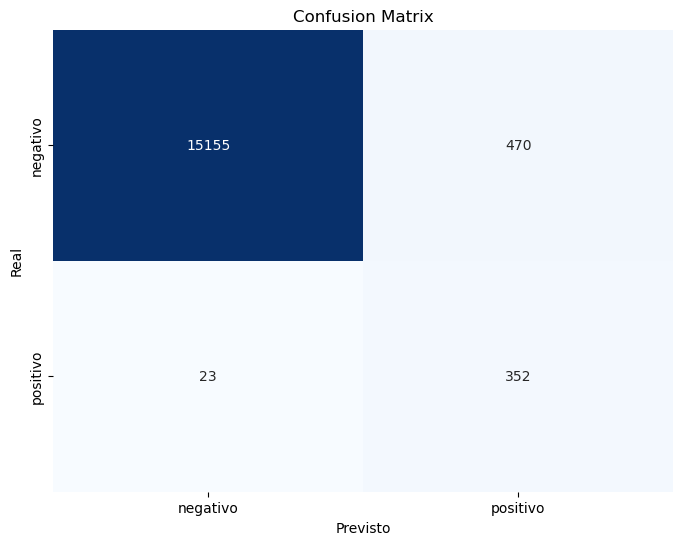

In [68]:
from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_present_resampled)

tn, fp, fn, tp = cm.ravel()  # tn: true negative, fp: false positive, fn: false negative, tp: true positive

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

                                                              Confusion Matrix:
                                                             
                                                                       predicted
                                                                        0   1
                                                               True
                                                               0        TN  FP
                                                               1        FN  TP

In [70]:
print("tn=",tn);print("tp=",tp);print("fn=",fn);print("fp=",fp)

tn= 15155
tp= 352
fn= 23
fp= 470


In [71]:

 # class 0 (N):
# classification_report
support_zero= tn + fp #(confusion_matrix)
print("support_zero=",support_zero)

 # class 1 (P):
# classification_report
support_uno= fn + tp #(confusion_matrix)
print("support_uno=",support_uno)


support_zero= 15625
support_uno= 375


In [72]:
# Cost of Inspection without Defect (FP):
# Cost for each false positive = $10

Inspection_without_defect = fp * 10

print("Cost of inspection without defect : $", Inspection_without_defect)

# Preventive Maintenance Cost for Identified Defect (TP):
# Cost for each true positive = $25

Identified_Defect = tp * 25
print("Cost for Identified Defect: $", Identified_Defect)

#Corrective Maintenance Cost for Unidentified Defect (FN):
#Cost for each false negative = $500

Unidentified_Defect = fn * 500
print(" Cost for Unidentified Defect: $", Unidentified_Defect)

#------------------------------------------------------------------------

total_cost=Unidentified_Defect+Identified_Defect+Inspection_without_defect
print("Total_cost: $", total_cost)

Cost of inspection without defect : $ 4700
Cost for Identified Defect: $ 8800
 Cost for Unidentified Defect: $ 11500
Total_cost: $ 25000


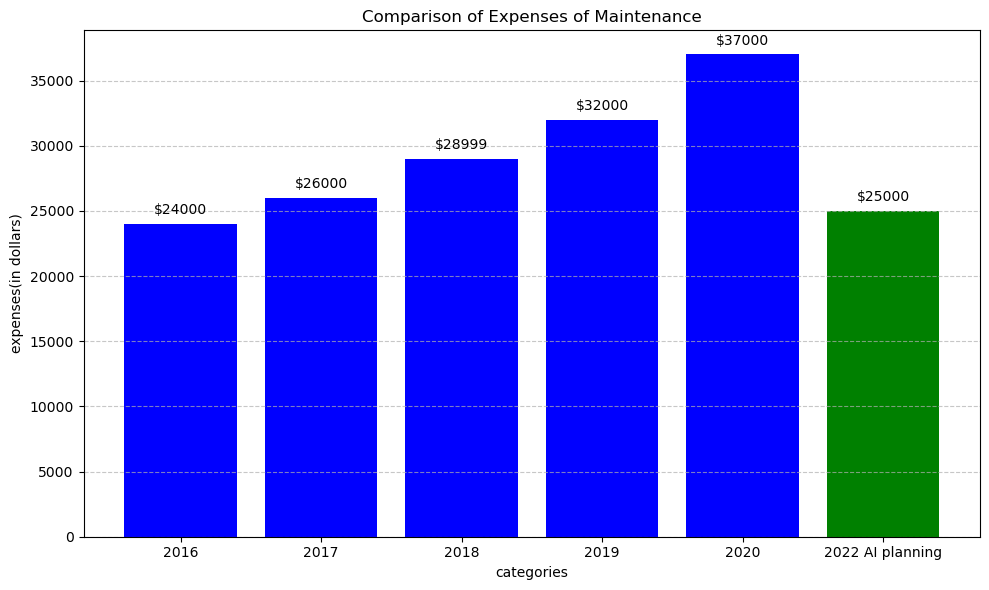

In [73]:
import matplotlib.pyplot as plt


categories = ['2016', '2017', '2018', '2019', '2020', '2022 AI planning']
expenses = [24000, 26000, 28999, 32000, 37000]

expenses.append(total_cost)


plt.figure(figsize=(10, 6))
plt.bar(categories, expenses, color=['blue']*5 + ['green'])


plt.title('Comparison of Expenses of Maintenance')
plt.xlabel('categories')
plt.ylabel('expenses(in dollars)')


for i, valor in enumerate(expenses):
    plt.text(i, valor + 500, f'${valor}', ha='center', va='bottom')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Critical Factors:
#### WHAT SHOULD BE IMPROVED?

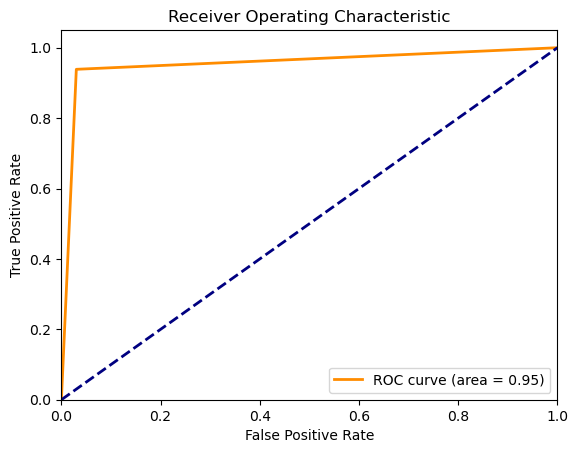

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_present_resampled)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

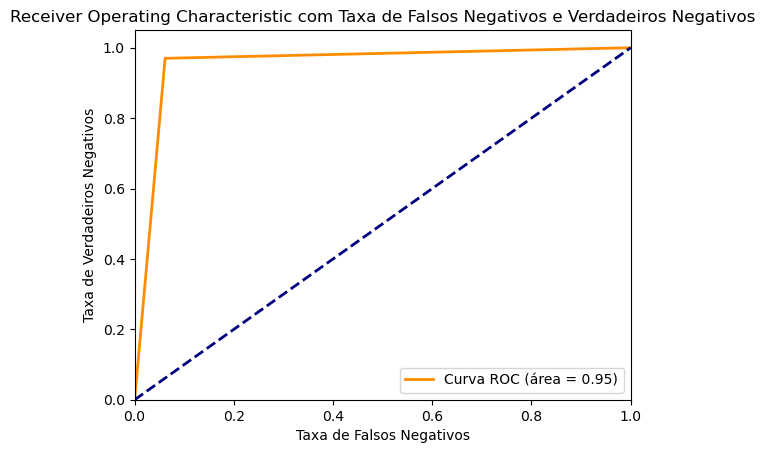

In [76]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_present_resampled)
fnr = 1 - tpr
tnr = 1 - fpr
roc_auc = auc(fnr, tnr)
plt.figure()
lw = 2
plt.plot(fnr, tnr, color='darkorange', lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Negativos')
plt.ylabel('Taxa de Verdadeiros Negativos')
plt.title('Receiver Operating Characteristic com Taxa de Falsos Negativos e Verdadeiros Negativos')
plt.legend(loc="lower right")
plt.show()

<span style="color: red;">For reasons of costs mainly false negatives should be more accurately predicted:</span>

##                                                         Business metric


  ###                                            1- Percentage of Reduction of Costs:
  #####  (Compared to higher previous costs)

In [80]:
higher_Previous_costs=37000
Estimated_Costs=total_cost

In [81]:
Percentage_Reduction_Costs=((higher_Previous_costs-Estimated_Costs)/higher_Previous_costs)*100

In [82]:
print(" Percentage_Reduction_Costs: %", Percentage_Reduction_Costs)

 Percentage_Reduction_Costs: % 32.432432432432435


 ###                                            2- Absolute Economy:

In [84]:
Absolute_Economy=higher_Previous_costs-Estimated_Costs
print(" Absolute_Economy: $", Absolute_Economy)

 Absolute_Economy: $ 12000
